# Numerical Simulation of RTPs in Reflecting Boundaries

## Time Evolution

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_rtp_reflecting(N, L, v, alpha, dt, T_max, x0=0.0):
    """
    Simulates the transient dynamics of N RTPs with reflecting boundaries.
    This version returns the full position history at every time step.

    Parameters:
    - N (int): Number of particles.
    - L (float): Length of the domain [0, L].
    - v (float): Speed of particles.
    - alpha (float): Tumbling rate.
    - dt (float): Time step for the simulation.
    - T_max (float): Total simulation time.
    - x0 (float): Initial position of all particles.

    Returns:
    - positions_over_time (np.ndarray): A (num_steps, N) array of all particle positions.
    - time_array (np.ndarray): A 1D array of time points.
    """
    # 1. Initialization
    positions = np.full(N, x0)
    directions = np.random.choice([-1, 1], size=N)

    num_steps = int(T_max / dt)
    # Create arrays to store the history
    positions_over_time = np.zeros((num_steps, N))
    time_array = np.linspace(0, T_max, num_steps)

    # 2. Time Evolution Loop
    for step in range(num_steps):
        # Tumbling
        tumble_chance = np.random.rand(N)
        directions[tumble_chance < alpha * dt] *= -1

        # Movement
        positions += directions * v * dt

        # Boundary Conditions: Reflect particles
        hit_left = positions < 0
        positions[hit_left] = -positions[hit_left]
        directions[hit_left] = 1

        hit_right = positions > L
        positions[hit_right] = 2 * L - positions[hit_right]
        directions[hit_right] = -1

        # Store the current state
        positions_over_time[step] = positions

    return positions_over_time, time_array


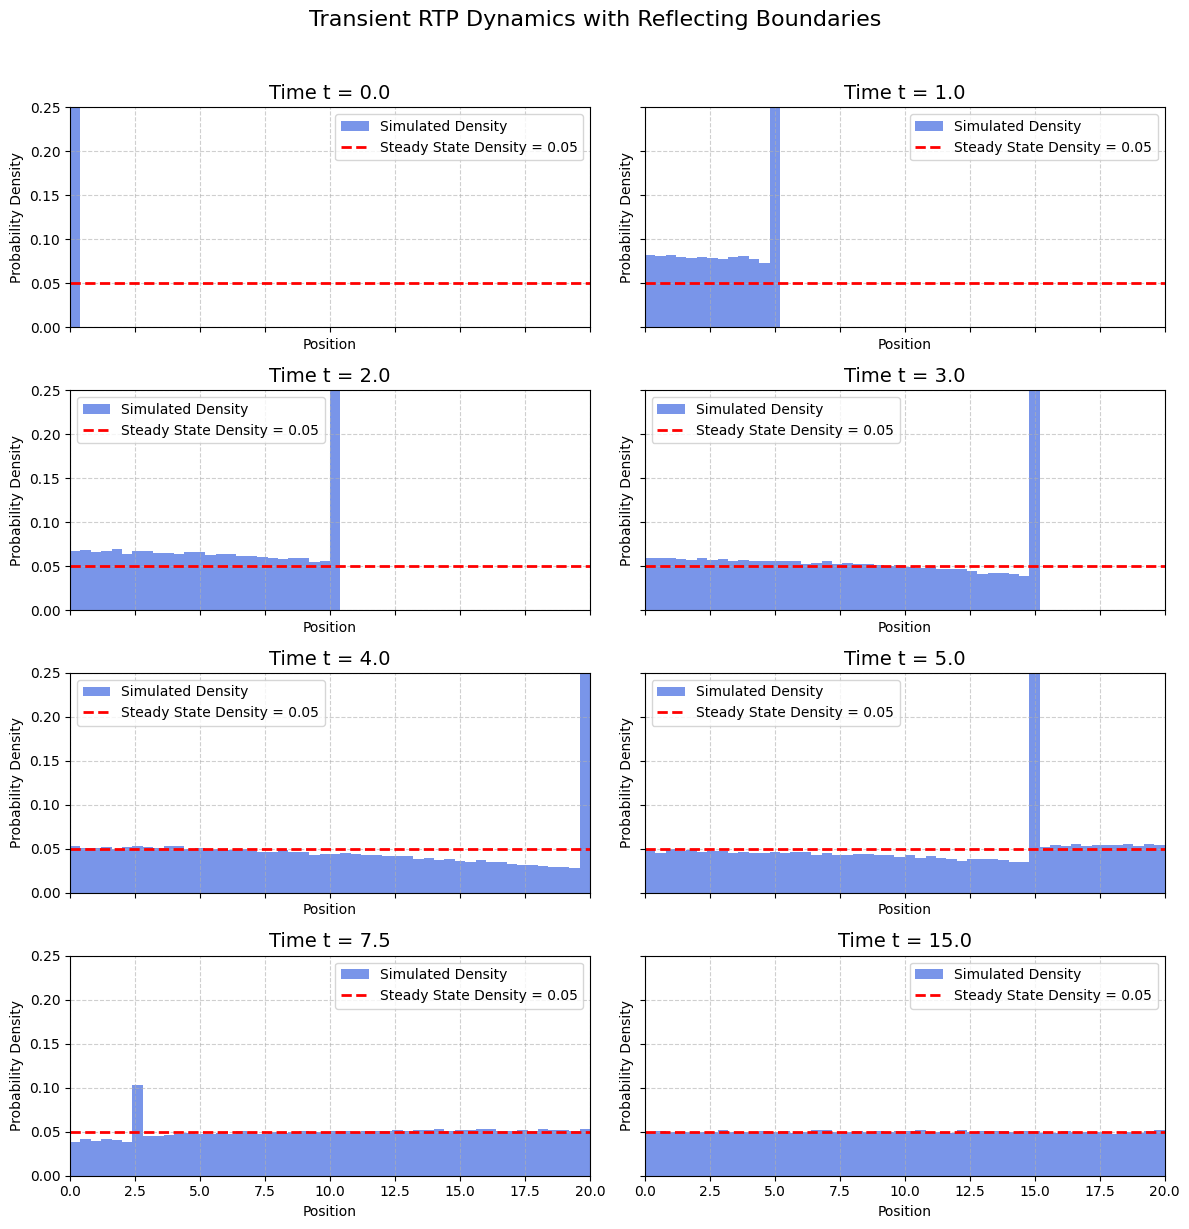

In [14]:

# --- Simulation Parameters ---
N_PARTICLES = 100000  # For smoother histograms
L_DOMAIN = 20.0
V_SPEED = 5.0
ALPHA_TUMBLE_RATE = 0.5
DT_STEP = 0.002
T_MAX_SIMULATION = 30.0

# --- Run the Simulation ---
position_history, time_points = simulate_rtp_reflecting(
    N=N_PARTICLES,
    L=L_DOMAIN,
    v=V_SPEED,
    alpha=ALPHA_TUMBLE_RATE,
    dt=DT_STEP,
    T_max=T_MAX_SIMULATION,
    x0=0.0
)

# Select specific time points to plot
plot_times = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.5, 15.0]

# Find the closest simulation step for each desired time
plot_indices = [np.abs(time_points - t).argmin() for t in plot_times]

fig, axes = plt.subplots(4, 2, figsize=(12, 12), sharex=True, sharey=True)
axes = axes.flatten() 

steady_state_density = 1 / L_DOMAIN

for i, idx in enumerate(plot_indices):
    ax = axes[i]
    current_time = time_points[idx]
    current_positions = position_history[idx]
    
    # Plot the histogram (probability density)
    ax.hist(current_positions, bins=50, density=True, range=(0, L_DOMAIN),
            color='royalblue', alpha=0.7, label='Simulated Density')
    
    # Plot the analytical steady-state solution for reference
    ax.axhline(steady_state_density, color='red', linestyle='--',
               linewidth=2, label=f'Steady State Density = {steady_state_density:.2f}')
    
    ax.set_title(f'Time t = {current_time:.1f}', fontsize=14)
    ax.set_xlabel('Position')
    ax.set_ylabel('Probability Density')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

# Set shared limits for a consistent view
ax.set_xlim(0, L_DOMAIN)
ax.set_ylim(0, 0.25)

fig.suptitle('Transient RTP Dynamics with Reflecting Boundaries', fontsize=16, y=1.02)
fig.tight_layout()
plt.show()

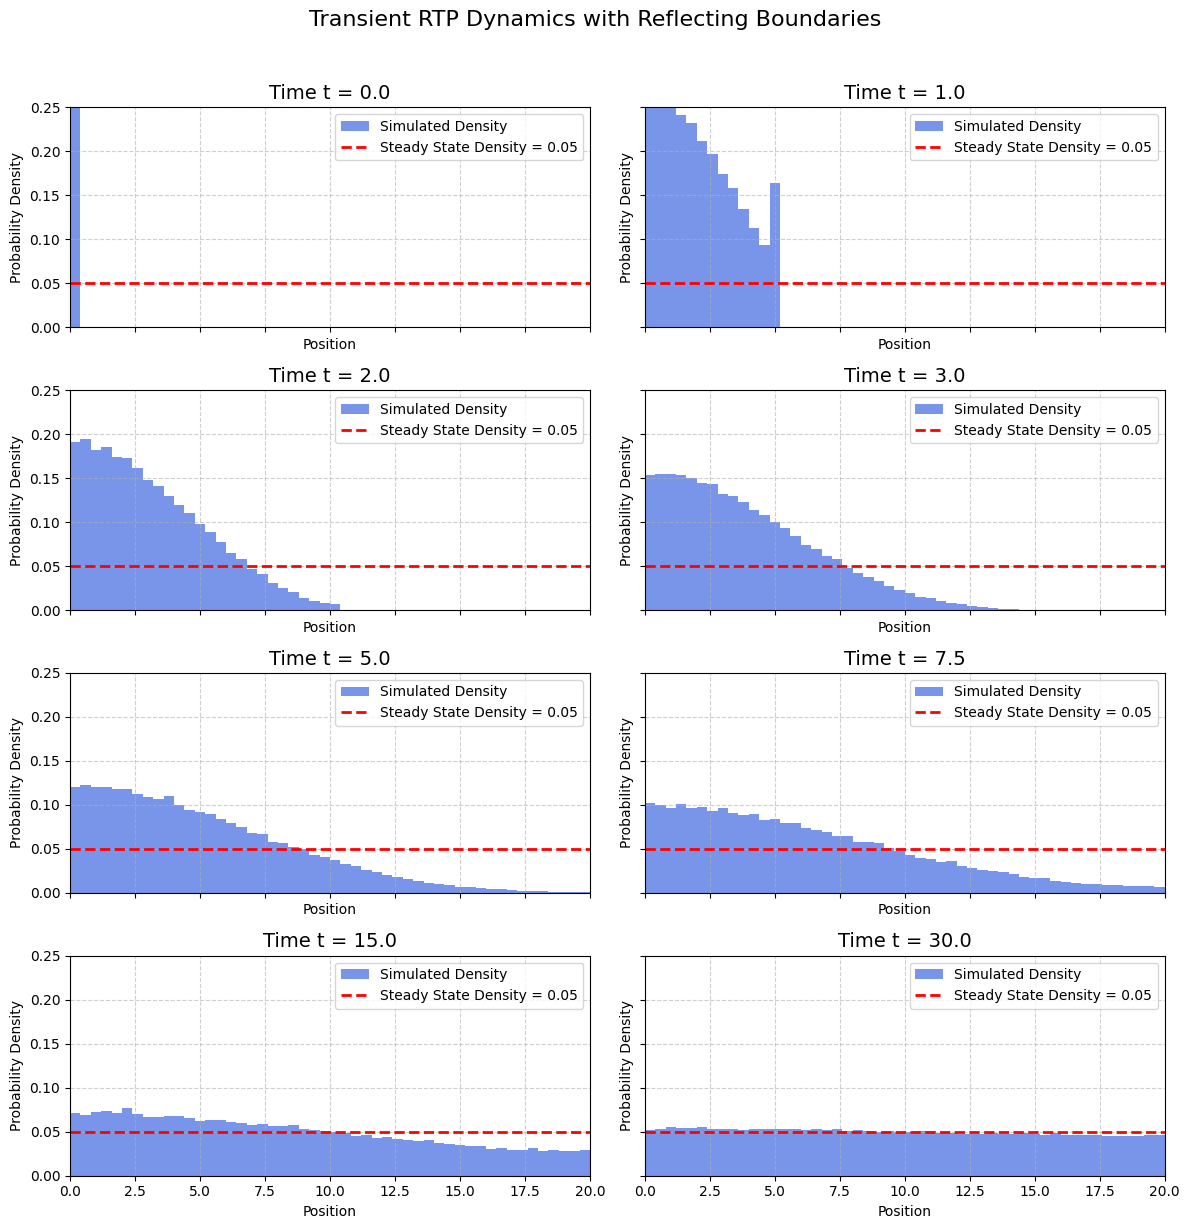

In [15]:
ALPHA_TUMBLE_RATE2 = 3.0

position_history, time_points = simulate_rtp_reflecting(
    N=N_PARTICLES,
    L=L_DOMAIN,
    v=V_SPEED,
    alpha=ALPHA_TUMBLE_RATE2,
    dt=DT_STEP,
    T_max=T_MAX_SIMULATION,
    x0=0.0
)

# Select specific time points to plot
plot_times = [0.0, 1.0, 2.0, 3.0, 5.0, 7.5, 15.0, 30.0]

# Find the closest simulation step for each desired time
plot_indices = [np.abs(time_points - t).argmin() for t in plot_times]

fig, axes = plt.subplots(4, 2, figsize=(12, 12), sharex=True, sharey=True)
axes = axes.flatten() # Flatten the 2x2 grid of axes for easy iteration

steady_state_density = 1 / L_DOMAIN

for i, idx in enumerate(plot_indices):
    ax = axes[i]
    current_time = time_points[idx]
    current_positions = position_history[idx]
    
    # Plot the histogram (probability density)
    ax.hist(current_positions, bins=50, density=True, range=(0, L_DOMAIN),
            color='royalblue', alpha=0.7, label='Simulated Density')
    
    # Plot the analytical steady-state solution for reference
    ax.axhline(steady_state_density, color='red', linestyle='--',
               linewidth=2, label=f'Steady State Density = {steady_state_density:.2f}')
    
    # Formatting
    ax.set_title(f'Time t = {current_time:.1f}', fontsize=14)
    ax.set_xlabel('Position')
    ax.set_ylabel('Probability Density')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

# Set shared limits for a consistent view
ax.set_xlim(0, L_DOMAIN)
ax.set_ylim(0, 0.25)

fig.suptitle('Transient RTP Dynamics with Reflecting Boundaries', fontsize=16, y=1.02)
fig.tight_layout()
plt.show()

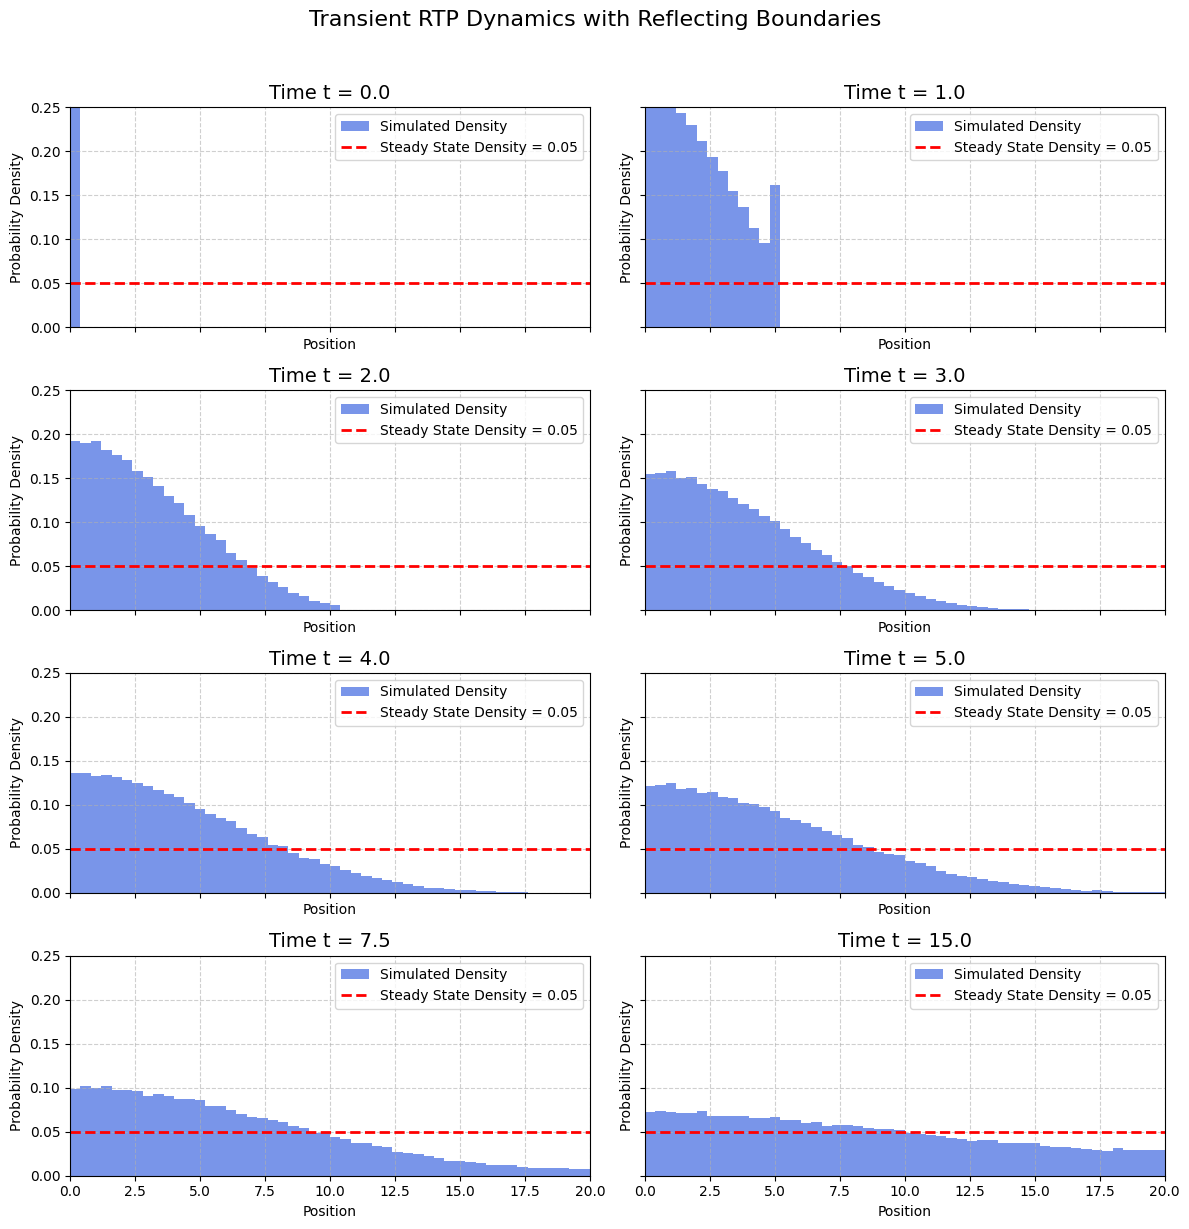

In [16]:
ALPHA_TUMBLE_RATE3 = V_SPEED * np.pi / L_DOMAIN

position_history, time_points = simulate_rtp_reflecting(
    N=N_PARTICLES,
    L=L_DOMAIN,
    v=V_SPEED,
    alpha=ALPHA_TUMBLE_RATE2,
    dt=DT_STEP,
    T_max=T_MAX_SIMULATION,
    x0=0.0
)

# Select specific time points to plot
plot_times = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.5, 15.0]

# Find the closest simulation step for each desired time
plot_indices = [np.abs(time_points - t).argmin() for t in plot_times]

fig, axes = plt.subplots(4, 2, figsize=(12, 12), sharex=True, sharey=True)
axes = axes.flatten() # Flatten the 2x2 grid of axes for easy iteration

steady_state_density = 1 / L_DOMAIN

for i, idx in enumerate(plot_indices):
    ax = axes[i]
    current_time = time_points[idx]
    current_positions = position_history[idx]
    
    # Plot the histogram (probability density)
    ax.hist(current_positions, bins=50, density=True, range=(0, L_DOMAIN),
            color='royalblue', alpha=0.7, label='Simulated Density')
    
    # Plot the analytical steady-state solution for reference
    ax.axhline(steady_state_density, color='red', linestyle='--',
               linewidth=2, label=f'Steady State Density = {steady_state_density:.2f}')
    
    # Formatting
    ax.set_title(f'Time t = {current_time:.1f}', fontsize=14)
    ax.set_xlabel('Position')
    ax.set_ylabel('Probability Density')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

# Set shared limits for a consistent view
ax.set_xlim(0, L_DOMAIN)
ax.set_ylim(0, 0.25)

fig.suptitle('Transient RTP Dynamics with Reflecting Boundaries', fontsize=16, y=1.02)
fig.tight_layout()
plt.show()

## Dominant Eigenvalue Analysis

Theoretical dominant decay rate (slope): -0.3810
Theoretical dominant decay rate (slope): -0.3810


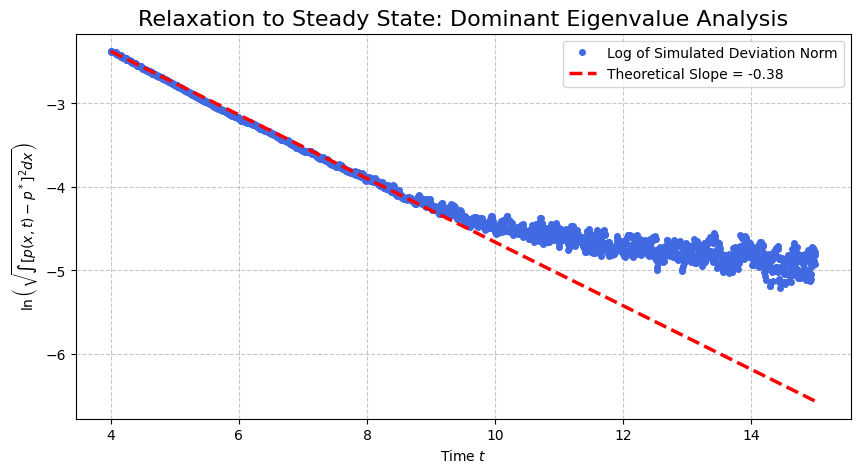

In [ ]:
# Parameters 
N_PARTICLES = 50000
L_DOMAIN = 20.0
V_SPEED = 5.0
ALPHA_TUMBLE_RATE = 1.0 
DT_STEP = 0.005
T_MAX_SIMULATION = 15.0 # We need a long enough time to see the relaxation

position_history, time_points = simulate_rtp_reflecting(
    N=N_PARTICLES, 
    L=L_DOMAIN, 
    v=V_SPEED, 
    alpha=ALPHA_TUMBLE_RATE, 
    dt=DT_STEP, 
    T_max=T_MAX_SIMULATION, 
    x0=0.0
)

# Calculate the deviation from steady state over time
steady_state_density = 1 / L_DOMAIN
deviations = []
num_bins = 50
bin_width = L_DOMAIN / num_bins

for positions_at_t in position_history:
    # The histogram density for this time snapshot
    hist, _ = np.histogram(positions_at_t, bins=num_bins, range=(0, L_DOMAIN), density=True)
    
    # Calculate the integrated squared difference
    squared_diff = (hist - steady_state_density)**2
    deviation_norm = np.sqrt(np.sum(squared_diff) * bin_width)
    deviations.append(deviation_norm)

# The theoretical dominant decay Rate
lambda_1 = (V_SPEED * np.pi / L_DOMAIN)**2
alpha_sq = ALPHA_TUMBLE_RATE**2

# The slope of the log plot is the real part of the dominant eigenvalue r_1^+
if alpha_sq >= lambda_1:
    # Overdamped case
    dominant_decay_rate = -ALPHA_TUMBLE_RATE + np.sqrt(alpha_sq - lambda_1)
else:
    # Underdamped case
    dominant_decay_rate = -ALPHA_TUMBLE_RATE

print(f"Theoretical dominant decay rate (slope): {dominant_decay_rate:.4f}")


fig, ax = plt.subplots(figsize=(10, 5))

# Convert deviations list to a NumPy array for easier indexing
deviations_np = np.array(deviations)

# Plot the log of the deviation vs time
# We filter out very early times
start_time_for_fit = 4.0
mask = time_points >= start_time_for_fit

ax.plot(time_points[mask], np.log(deviations_np[mask]), 'o', color='royalblue', markersize=4, label='Log of Simulated Deviation Norm')

# --- Calculate the Theoretical Dominant Decay Rate (Same as before) ---
lambda_1 = (V_SPEED * np.pi / L_DOMAIN)**2
alpha_sq = ALPHA_TUMBLE_RATE**2

if alpha_sq >= lambda_1:
    dominant_decay_rate = -ALPHA_TUMBLE_RATE + np.sqrt(alpha_sq - lambda_1)
else:
    dominant_decay_rate = -ALPHA_TUMBLE_RATE

print(f"Theoretical dominant decay rate (slope): {dominant_decay_rate:.4f}")


# Plot the theoretical slope for comparison
if np.any(mask): # Check if there are points to plot
    first_log_deviation = np.log(deviations_np[mask][0])
    first_time_point = time_points[mask][0]
    intercept = first_log_deviation - dominant_decay_rate * first_time_point
    
    ax.plot(time_points[mask], intercept + dominant_decay_rate * time_points[mask],
            color='red', linestyle='--', linewidth=2.5, label=f'Theoretical Slope = {dominant_decay_rate:.2f}')

ax.set_xlabel('Time $t$')
ax.set_ylabel('$\ln \left( \sqrt{\int [p(x,t) - p^*]^2 dx} \\right)$')
ax.set_title('Relaxation to Steady State: Dominant Eigenvalue Analysis', fontsize=16)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()

Theoretical dominant decay rate (slope): -0.5000
Theoretical dominant decay rate (slope): -0.5000


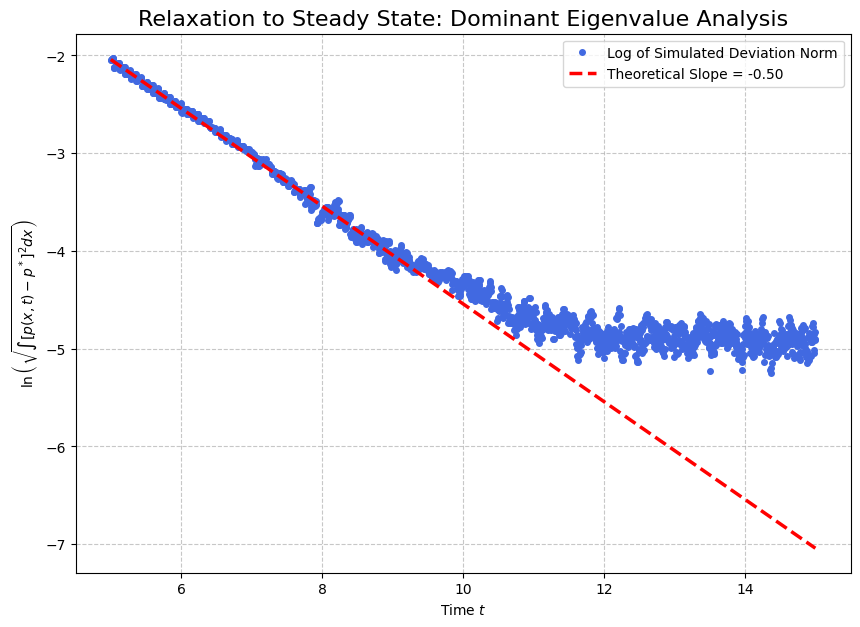

In [ ]:
# Parameters 
N_PARTICLES = 50000
L_DOMAIN = 20.0
V_SPEED = 5.0
ALPHA_TUMBLE_RATE = 0.5 
DT_STEP = 0.005
T_MAX_SIMULATION = 15.0 # We need a long enough time to see the relaxation

position_history, time_points = simulate_rtp_reflecting(
    N=N_PARTICLES, 
    L=L_DOMAIN, 
    v=V_SPEED, 
    alpha=ALPHA_TUMBLE_RATE, 
    dt=DT_STEP, 
    T_max=T_MAX_SIMULATION, 
    x0=0.0
)

# Calculate the deviation from steady state over time
steady_state_density = 1 / L_DOMAIN
deviations = []
num_bins = 50
bin_width = L_DOMAIN / num_bins

for positions_at_t in position_history:
    # The histogram density for this time snapshot
    hist, _ = np.histogram(positions_at_t, bins=num_bins, range=(0, L_DOMAIN), density=True)
    
    # Calculate the integrated squared difference
    squared_diff = (hist - steady_state_density)**2
    deviation_norm = np.sqrt(np.sum(squared_diff) * bin_width)
    deviations.append(deviation_norm)

# The theoretical dominant decay Rate
lambda_1 = (V_SPEED * np.pi / L_DOMAIN)**2
alpha_sq = ALPHA_TUMBLE_RATE**2

# The slope of the log plot is the real part of the dominant eigenvalue r_1^+
if alpha_sq >= lambda_1:
    # Overdamped case
    dominant_decay_rate = -ALPHA_TUMBLE_RATE + np.sqrt(alpha_sq - lambda_1)
else:
    # Underdamped case
    dominant_decay_rate = -ALPHA_TUMBLE_RATE

print(f"Theoretical dominant decay rate (slope): {dominant_decay_rate:.4f}")

# --- Plotting the Log of the Deviation Norm vs Time ---
fig, ax = plt.subplots(figsize=(10, 7))

# Convert deviations list to a NumPy array for easier indexing
deviations_np = np.array(deviations)

# Plot the log of the deviation vs time
# We filter out very early times where many modes are present
start_time_for_fit = 4.0
mask = time_points >= start_time_for_fit

ax.plot(time_points[mask], np.log(deviations_np[mask]), 'o', color='royalblue', markersize=4, label='Log of Simulated Deviation Norm')

# --- Calculate the Theoretical Dominant Decay Rate (Same as before) ---
lambda_1 = (V_SPEED * np.pi / L_DOMAIN)**2
alpha_sq = ALPHA_TUMBLE_RATE**2

if alpha_sq >= lambda_1:
    dominant_decay_rate = -ALPHA_TUMBLE_RATE + np.sqrt(alpha_sq - lambda_1)
else:
    dominant_decay_rate = -ALPHA_TUMBLE_RATE

print(f"Theoretical dominant decay rate (slope): {dominant_decay_rate:.4f}")


# Plot the theoretical slope for comparison
if np.any(mask): # Check if there are points to plot
    first_log_deviation = np.log(deviations_np[mask][0])
    first_time_point = time_points[mask][0]
    intercept = first_log_deviation - dominant_decay_rate * first_time_point
    
    ax.plot(time_points[mask], intercept + dominant_decay_rate * time_points[mask],
            color='red', linestyle='--', linewidth=2.5, label=f'Theoretical Slope = {dominant_decay_rate:.2f}')

ax.set_xlabel('Time $t$')
ax.set_ylabel('$\ln \left( \sqrt{\int [p(x,t) - p^*]^2 dx} \\right)$')
ax.set_title('Relaxation to Steady State: Dominant Eigenvalue Analysis', fontsize=16)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()